# 使用V1版本回测

In [1]:
import sys
sys.path.append("../")
from utils.RollingLoadratePrice_utils_V1 import *

# 1) 处理市场数据
market_data = pd.read_parquet("../data/processed/shanxi_new.parquet",engine='fastparquet')
market_data = process_market_data(market_data, date_begin="2025-01-01", date_end="2025-08-05")
pred_csv_path="../save/curve_classify/multi_GRU_predict_results_V2.csv"
truth_csv_path="../data/processed/hiking_01_dataset.csv"
date_begin="2025-07-21" 
date_end="2025-08-05"

# 2) 直接从两个CSV构建curves_record
curves_record_match = build_curves_record_with_history_classify_from_csv(
    market_data=market_data,
    date_begin=date_begin,
    date_end=date_end,
    d=5,
    pred_csv_path=pred_csv_path,  
    truth_csv_path=truth_csv_path,            
    selection="match",   # 或 'baseline' / 'pos_only' / 'neg_only'
)

curves_record_baseline = build_curves_record_with_history_classify_from_csv(
    market_data=market_data,
    date_begin=date_begin,
    date_end=date_end,
    d=5,
    pred_csv_path=pred_csv_path,  
    truth_csv_path=truth_csv_path,            
    selection="baseline",   # 或 'baseline' / 'pos_only' / 'neg_only'
)


# 3) 查看CSV中哪些是预测错的、哪些是预测对的
correct, wrong = split_correct_wrong_by_csv(
    csv_path=pred_csv_path,
    date_begin=date_begin,
    date_end=date_end,
)


Index(['price', '实时价格', '实时在线机组容量(MW)', '实时负荷率(%)', '非市场化机组出力-日内(MW)',
       '联络线计划-日内(MW)', '竞价空间-日内(MW)', '频率实际值(MW)', '实际上旋备用(MW)', '实际下旋备用(MW)',
       '省调负荷-日内(MW)', '新能源负荷-日内(MW)', '实时风电(MW)', '实时光伏(MW)', '水电出力值-日内(MW)',
       '日前在线机组容量(MW)', '日前负荷率(%)', '非市场化机组出力-日前(MW)', '联络线计划-日前(MW)',
       '竞价空间-日前(MW)', '省调负荷-日前(MW)', '新能源负荷-日前(MW)', '正备用-日前(MW)',
       '新能源负荷备用-日前(MW)', '日前光伏(MW)', '日前风电(MW)'],
      dtype='object')


预测正确： ['2025-07-21', '2025-07-22', '2025-07-23', '2025-07-24', '2025-07-25', '2025-07-27', '2025-07-28', '2025-07-29', '2025-07-30', '2025-07-31', '2025-08-01', '2025-08-02']
预测错误： ['2025-07-26', '2025-08-03', '2025-08-04', '2025-08-05']


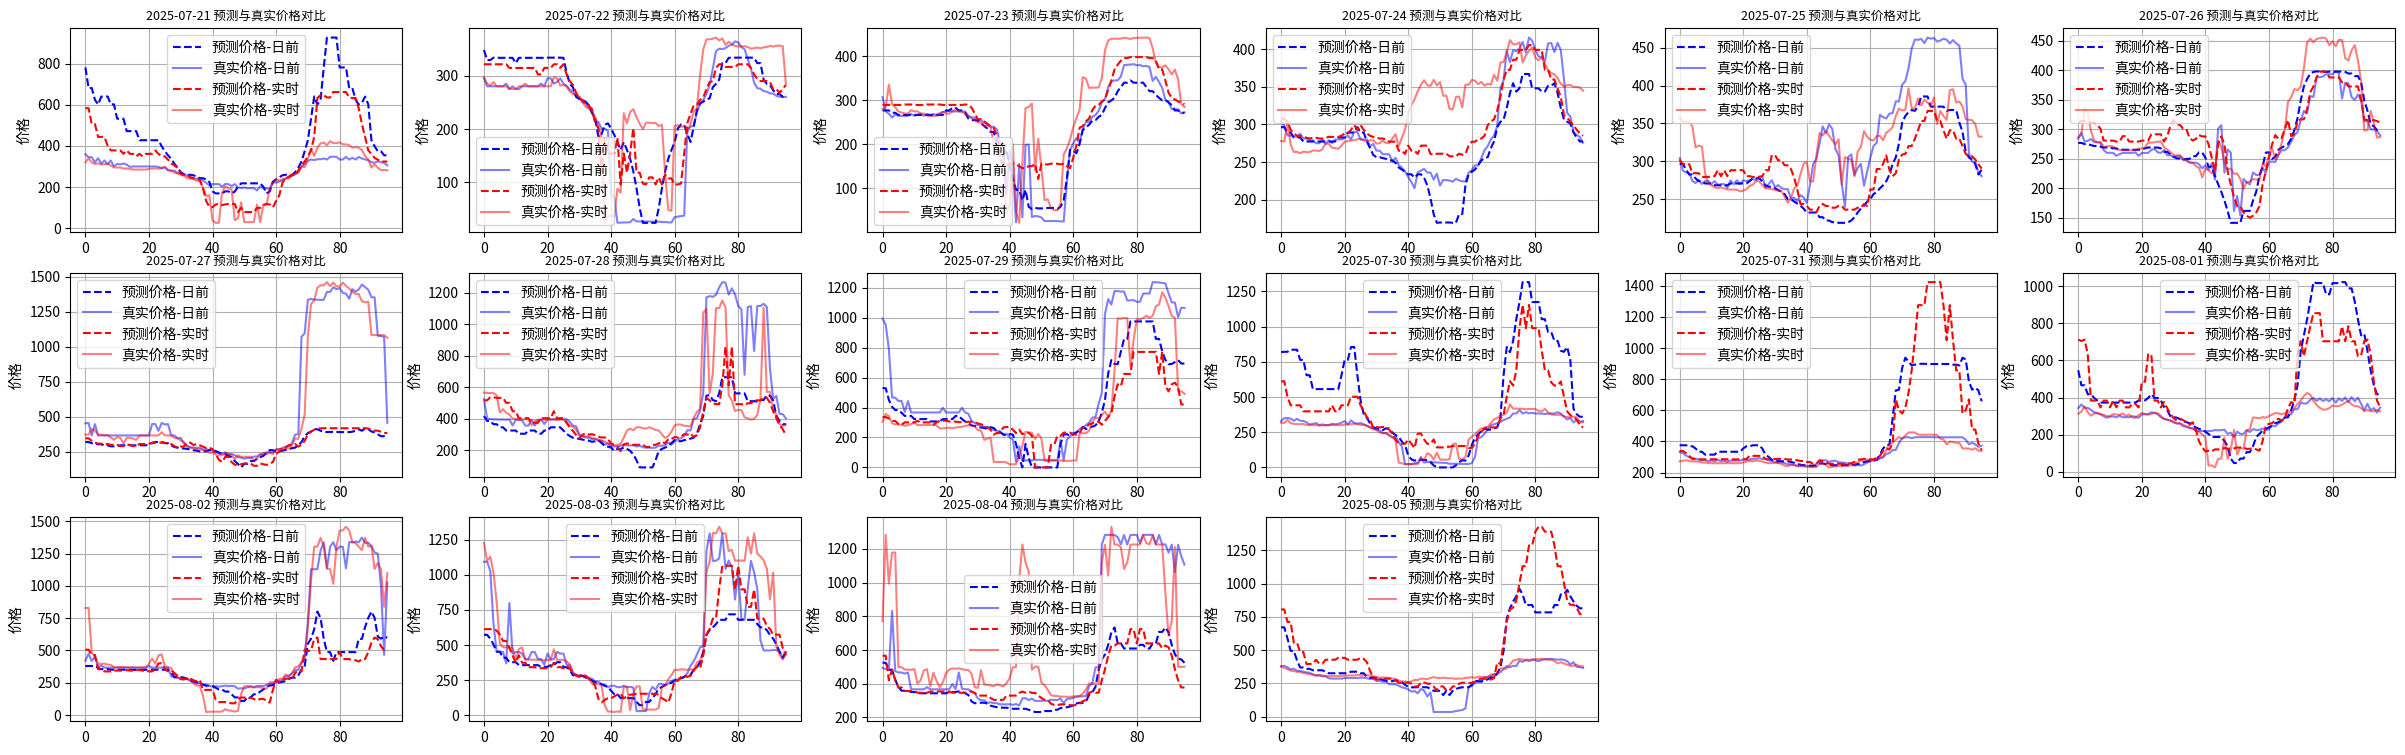

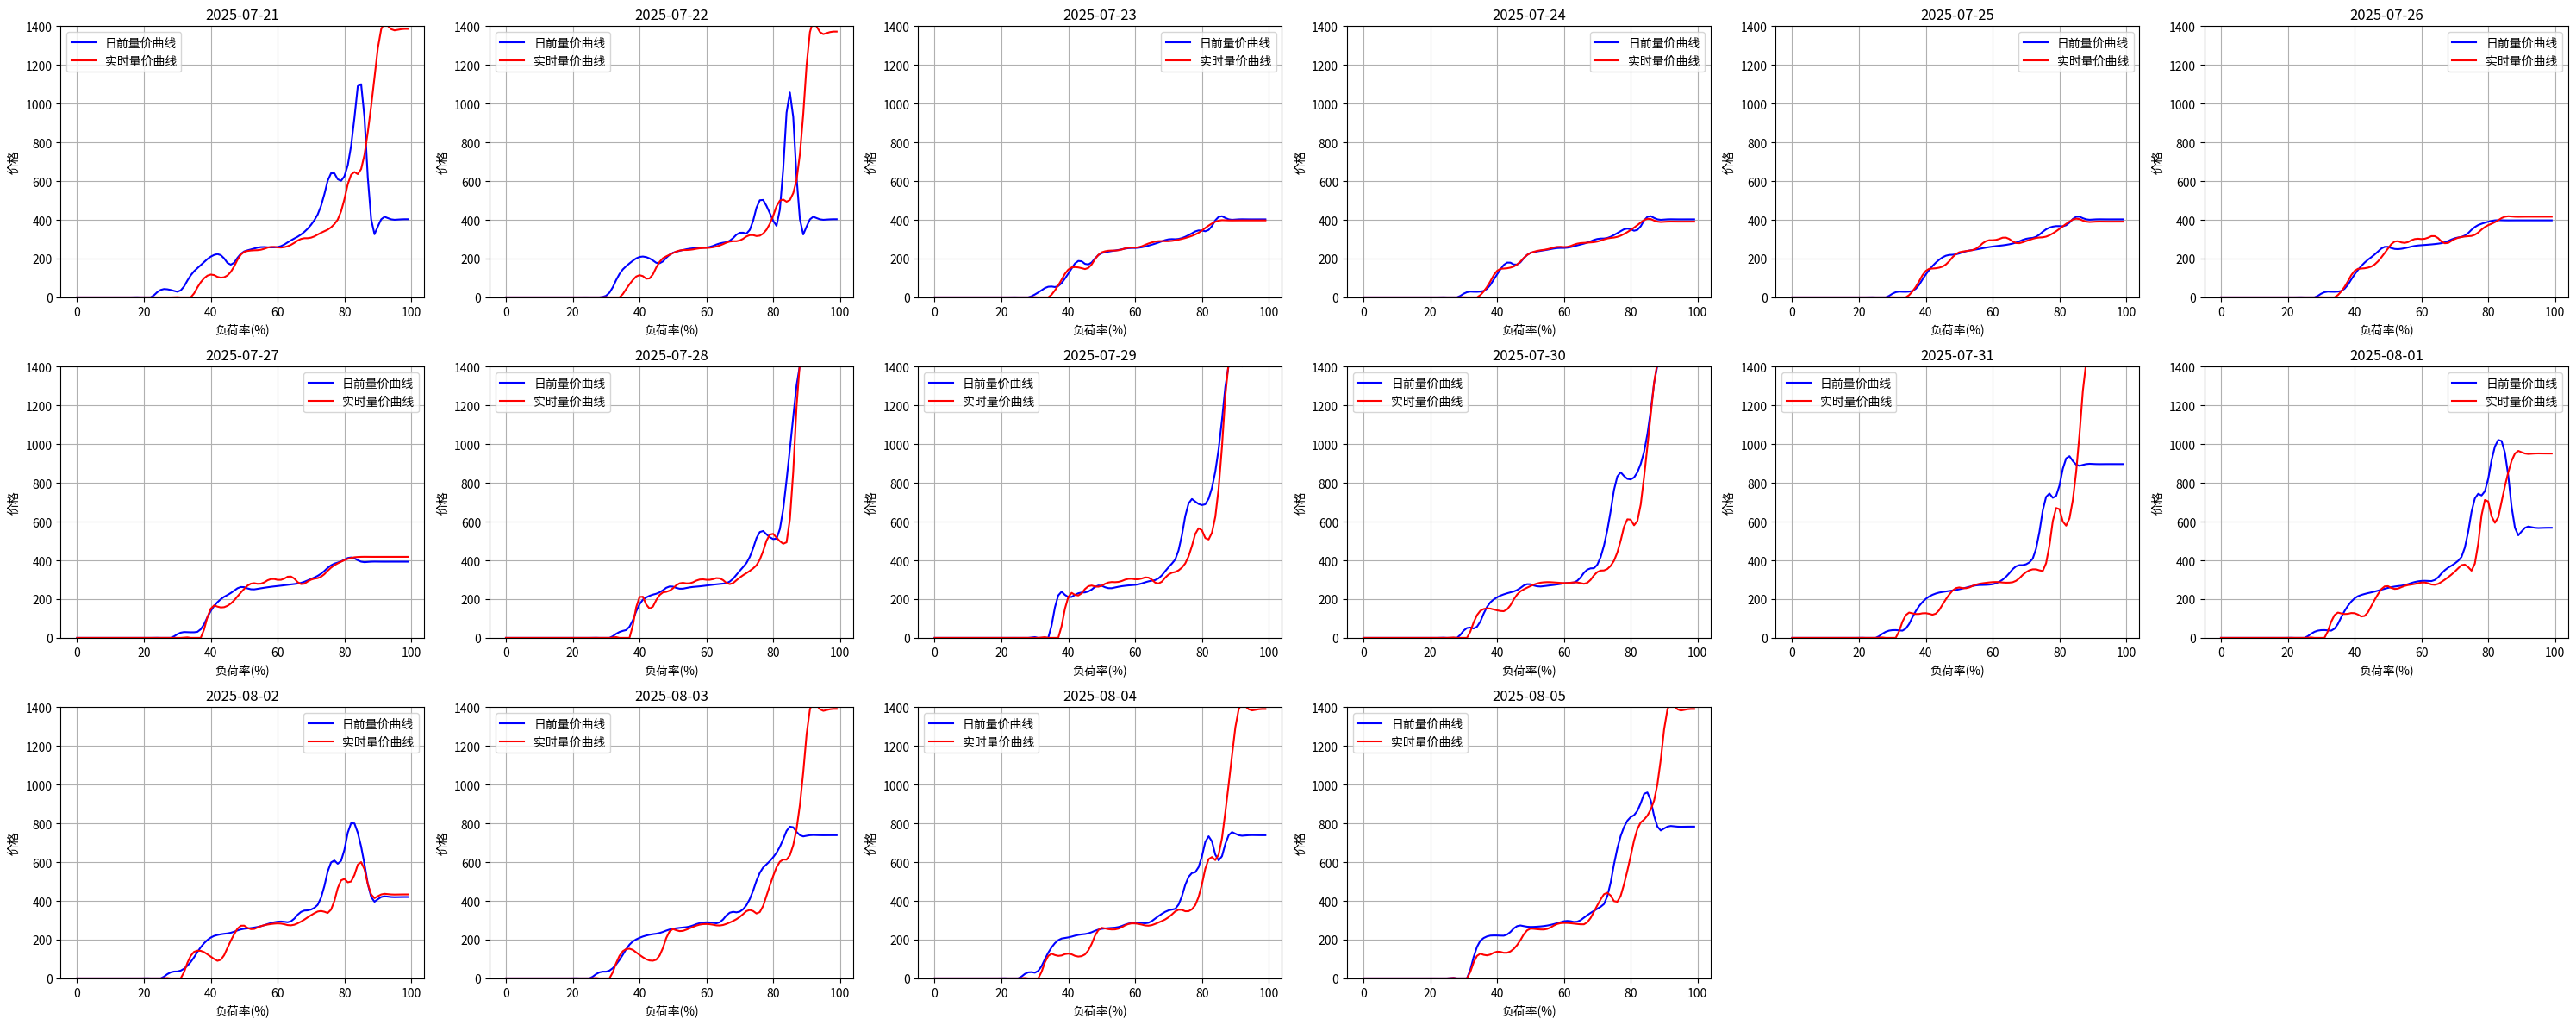

In [2]:
print("预测正确：", correct)
print("预测错误：", wrong)

plot_compare_predict_vs_true(curves_record_baseline)
plot_loadrate_price_curves(curves_record_baseline)

预测正确： ['2025-07-21', '2025-07-22', '2025-07-23', '2025-07-24', '2025-07-25', '2025-07-27', '2025-07-28', '2025-07-29', '2025-07-30', '2025-07-31', '2025-08-01', '2025-08-02']
预测错误： ['2025-07-26', '2025-08-03', '2025-08-04', '2025-08-05']


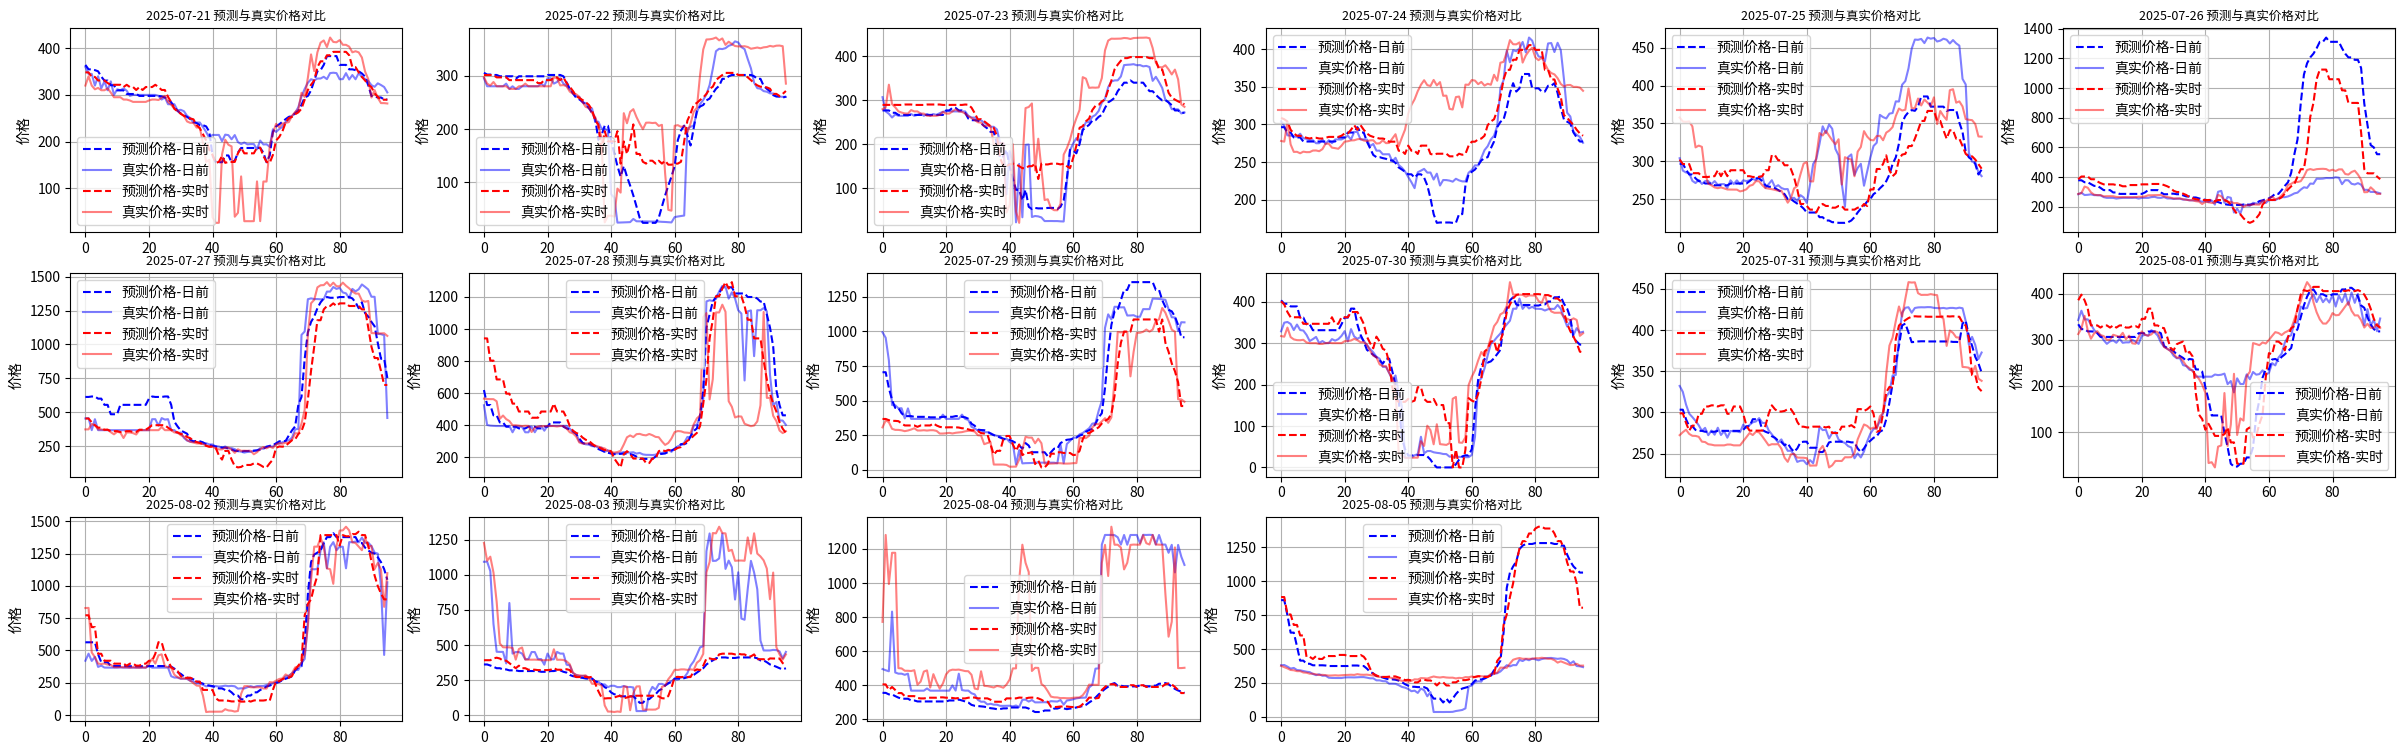

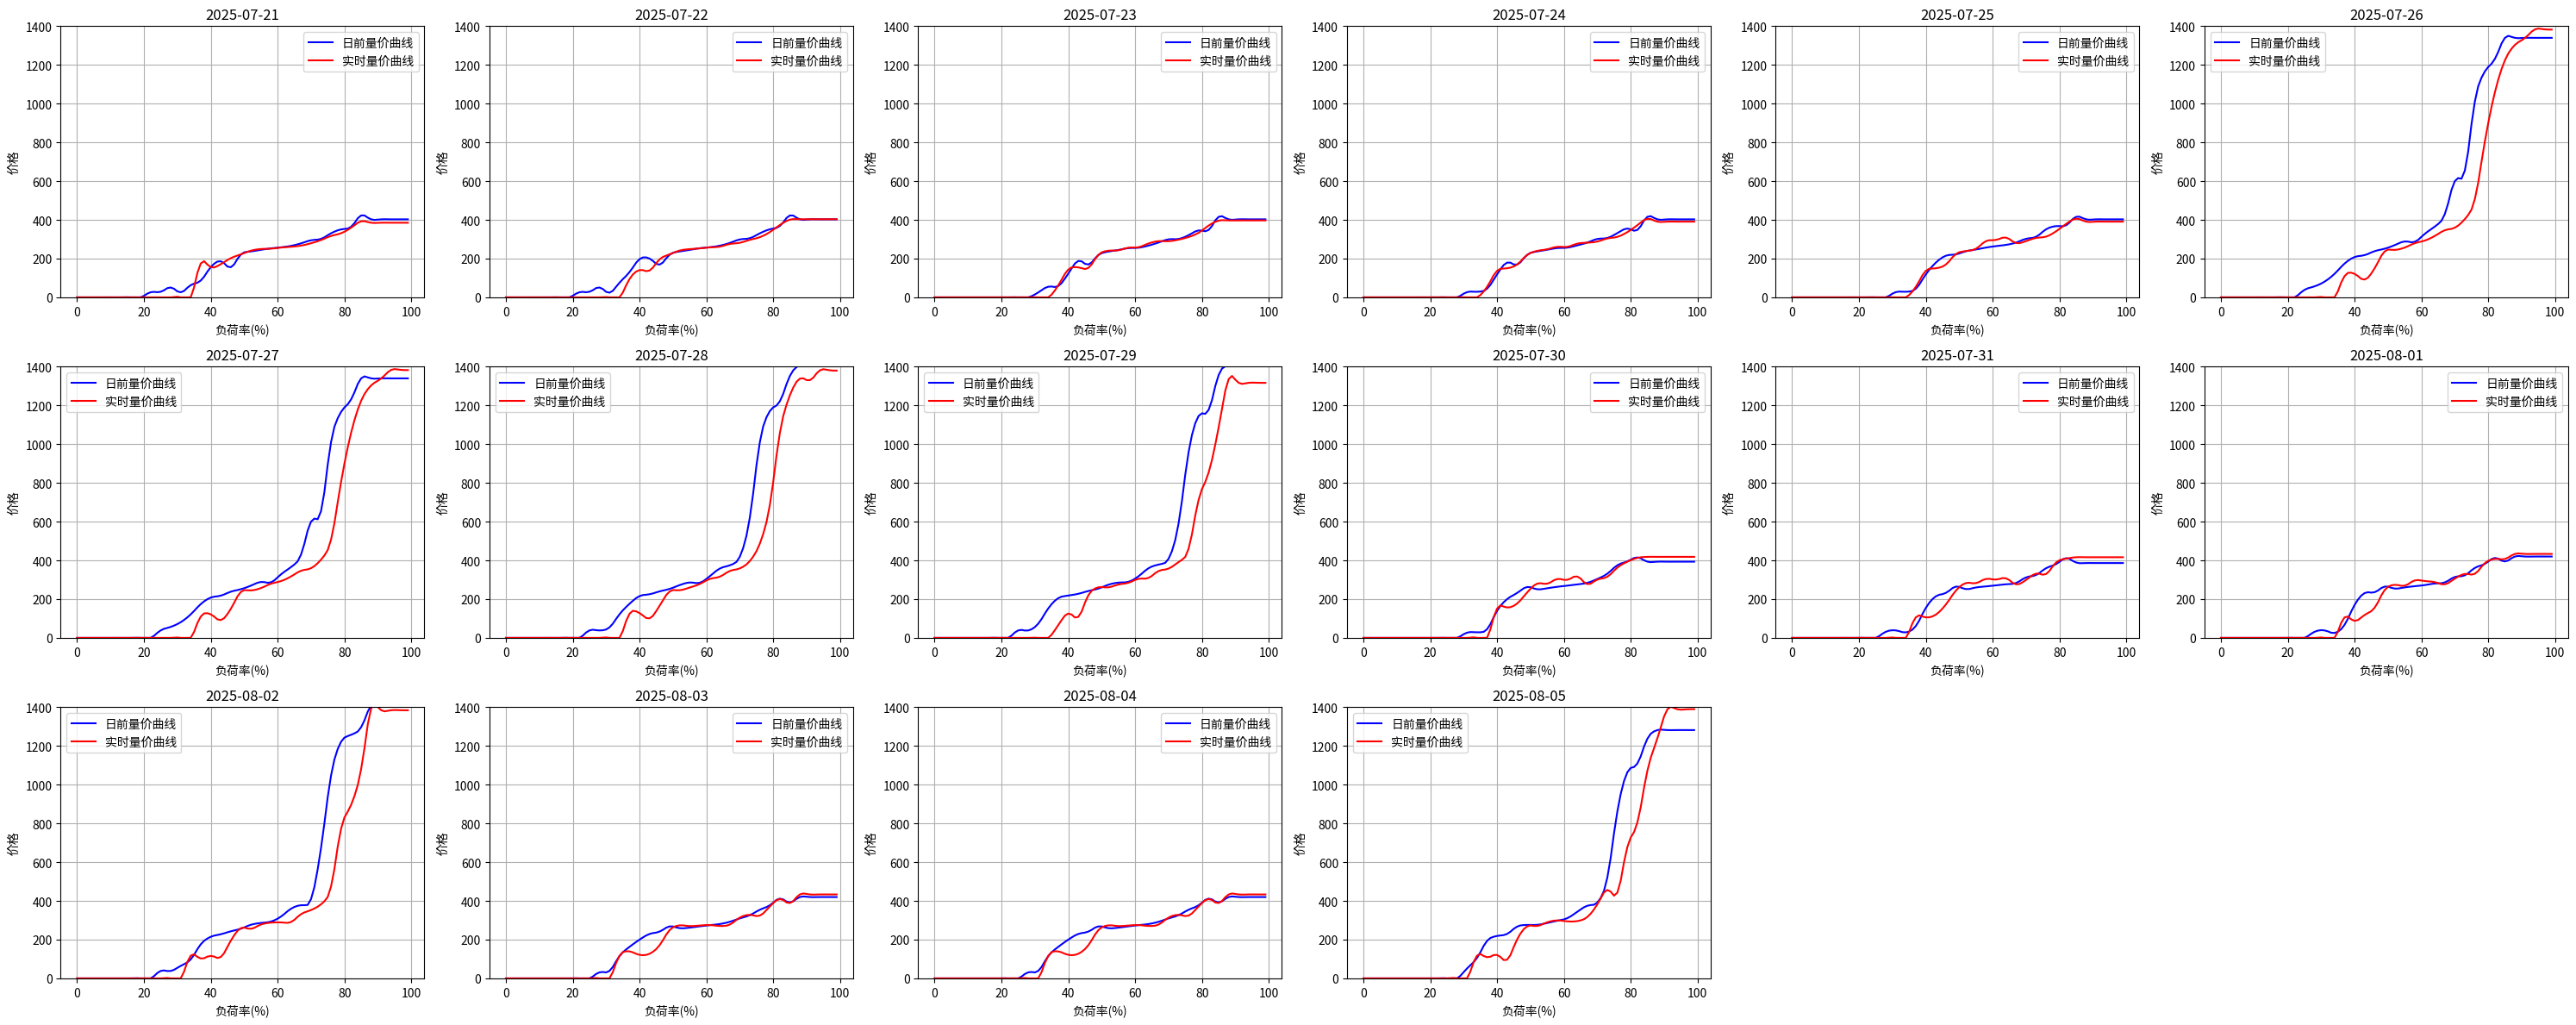

In [3]:
print("预测正确：", correct)
print("预测错误：", wrong)

plot_compare_predict_vs_true(curves_record_match)
plot_loadrate_price_curves(curves_record_match)

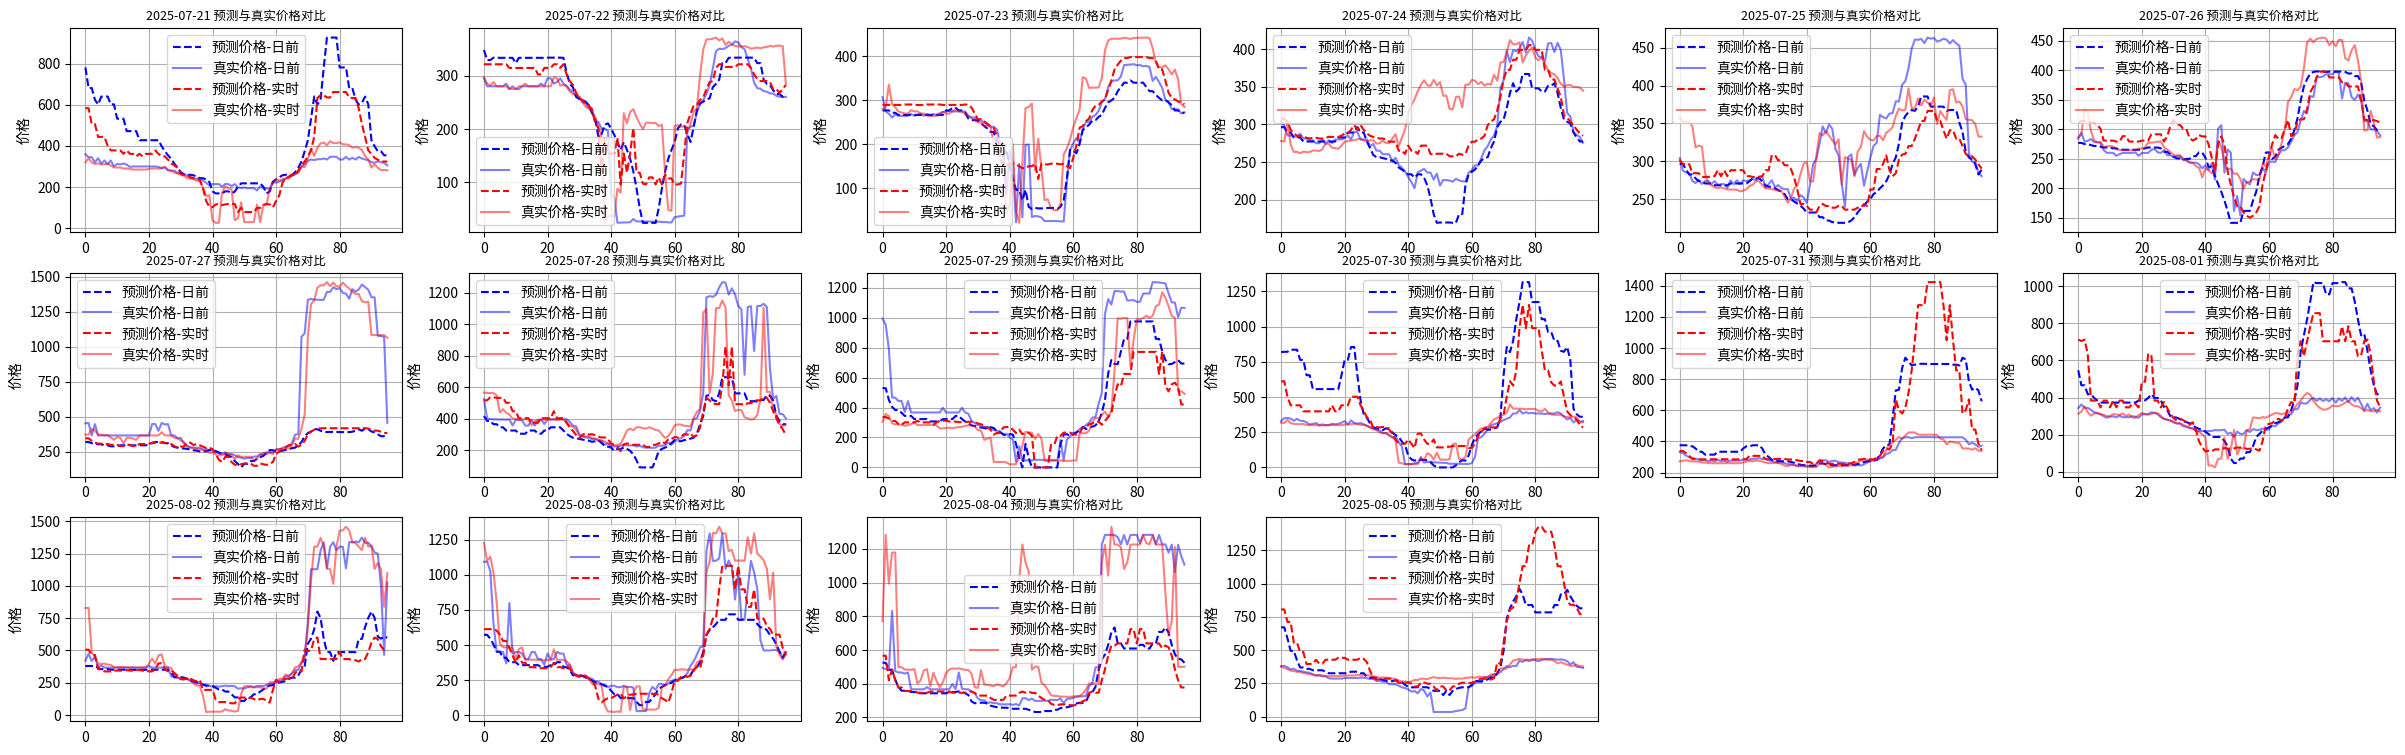

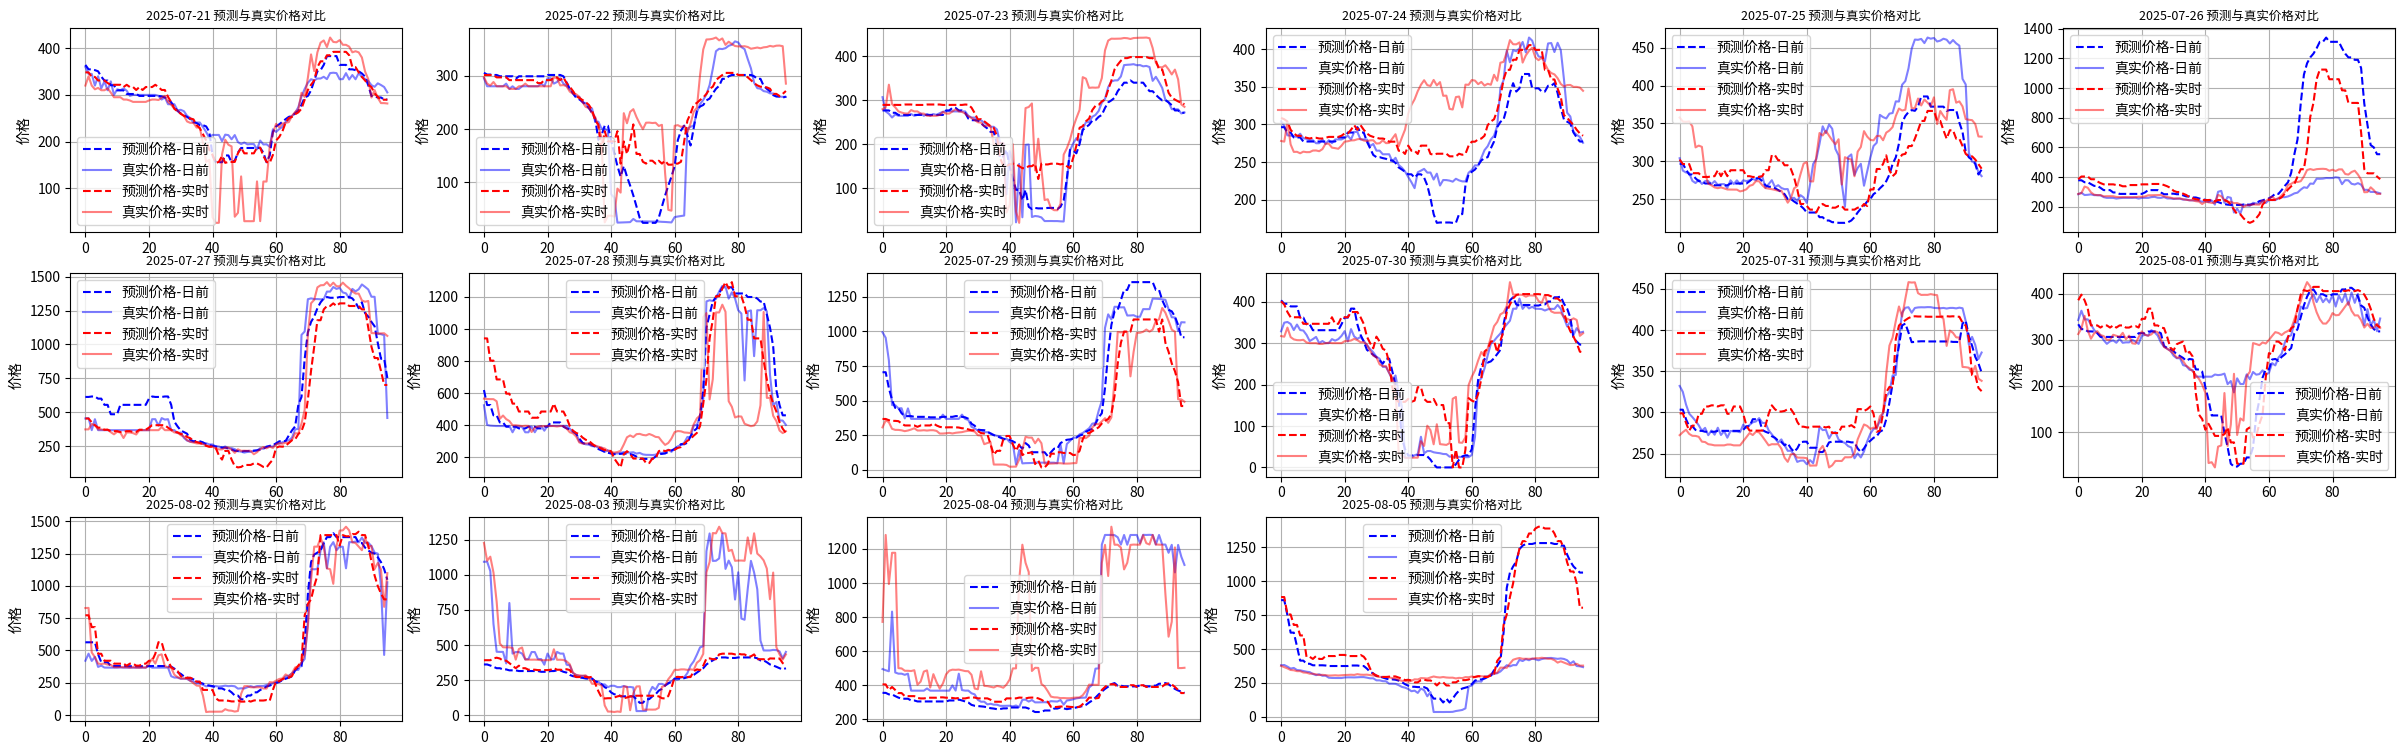

In [4]:
plot_compare_predict_vs_true(curves_record_baseline)
plot_compare_predict_vs_true(curves_record_match)

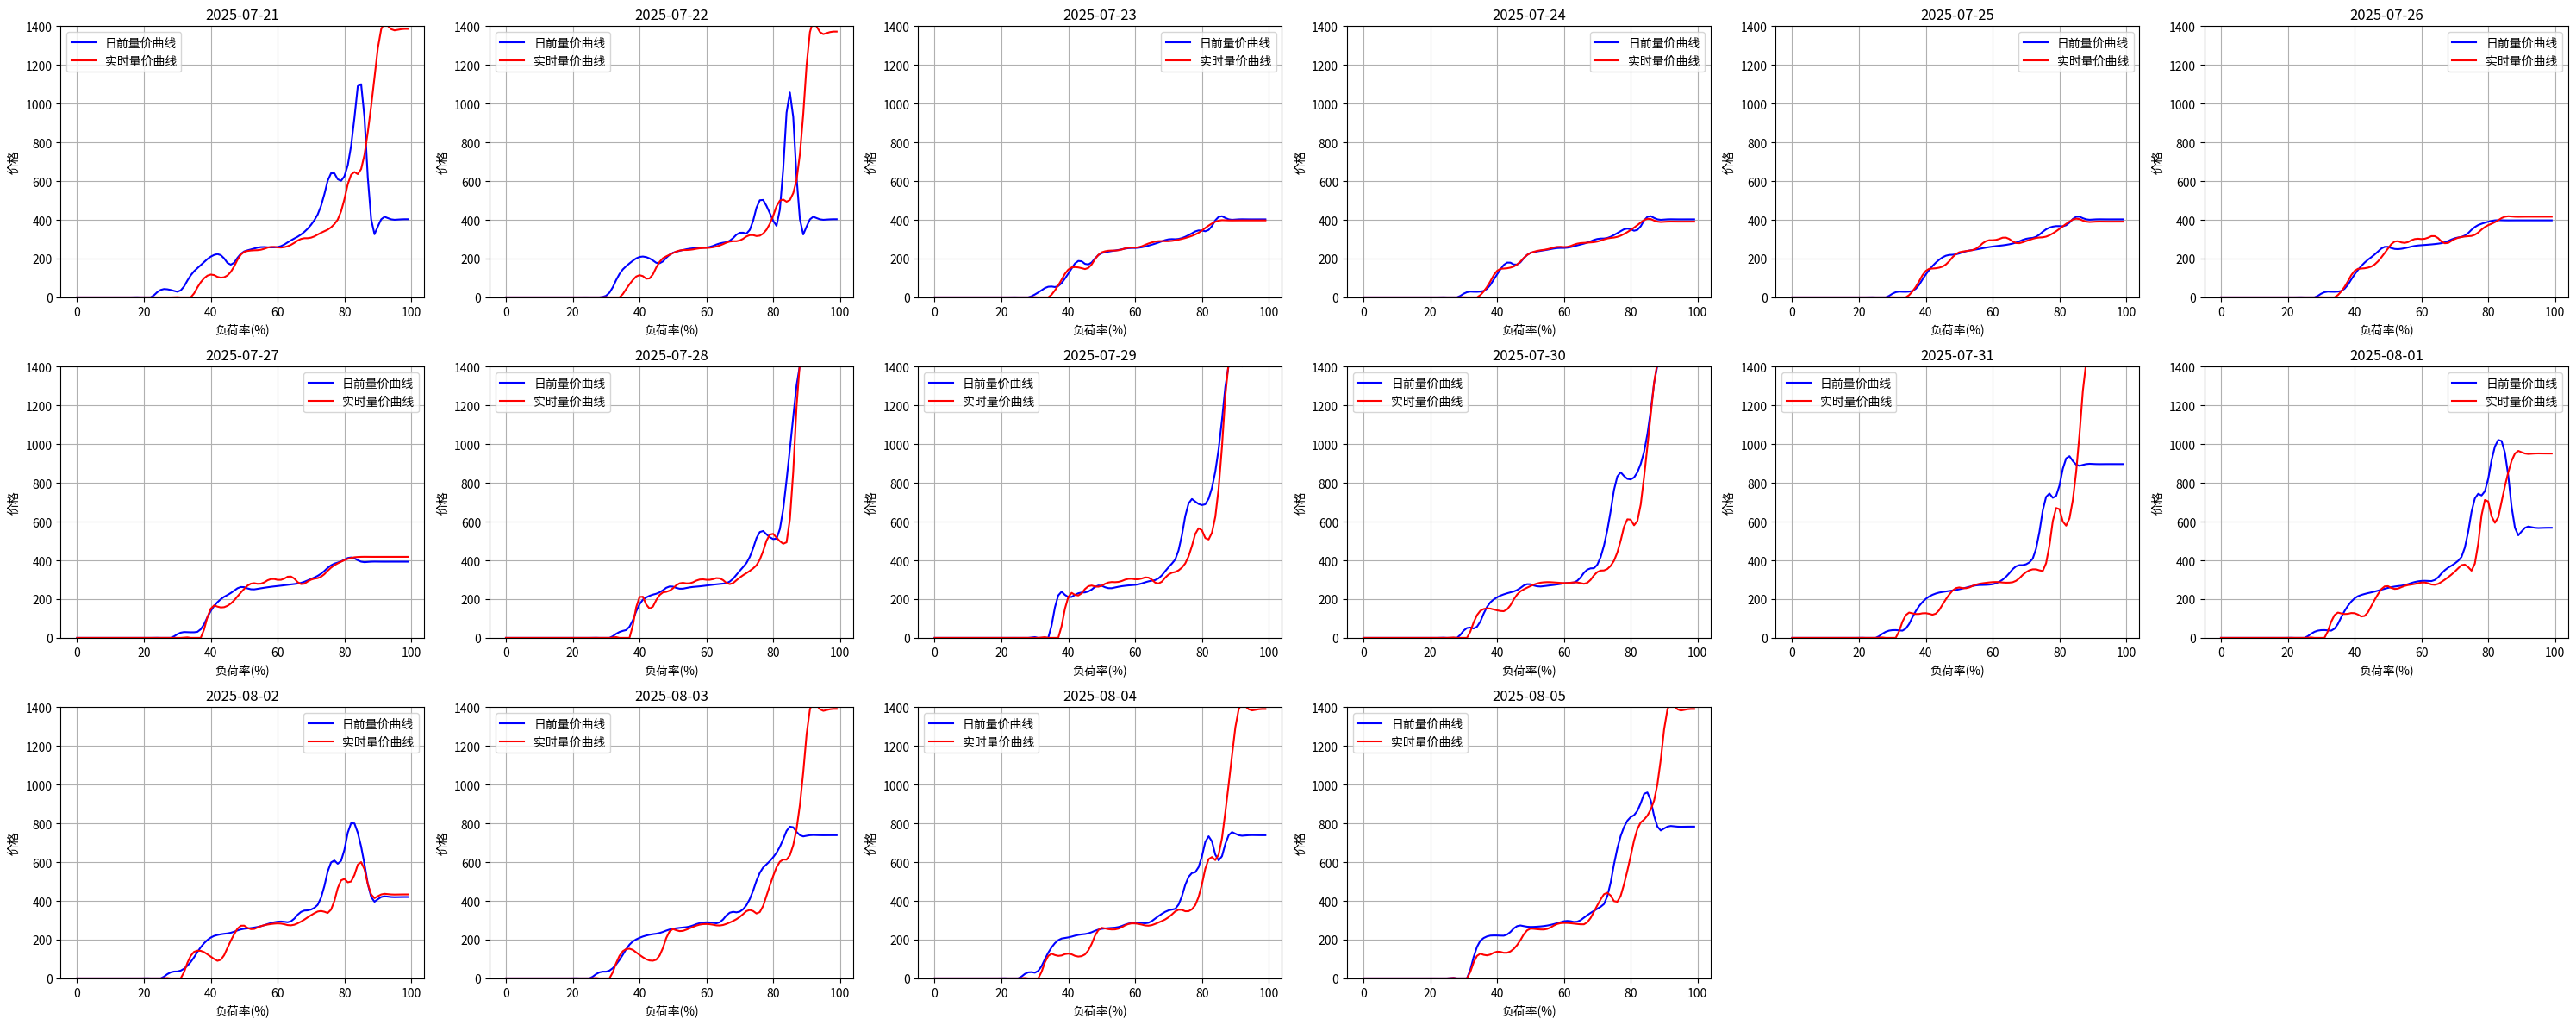

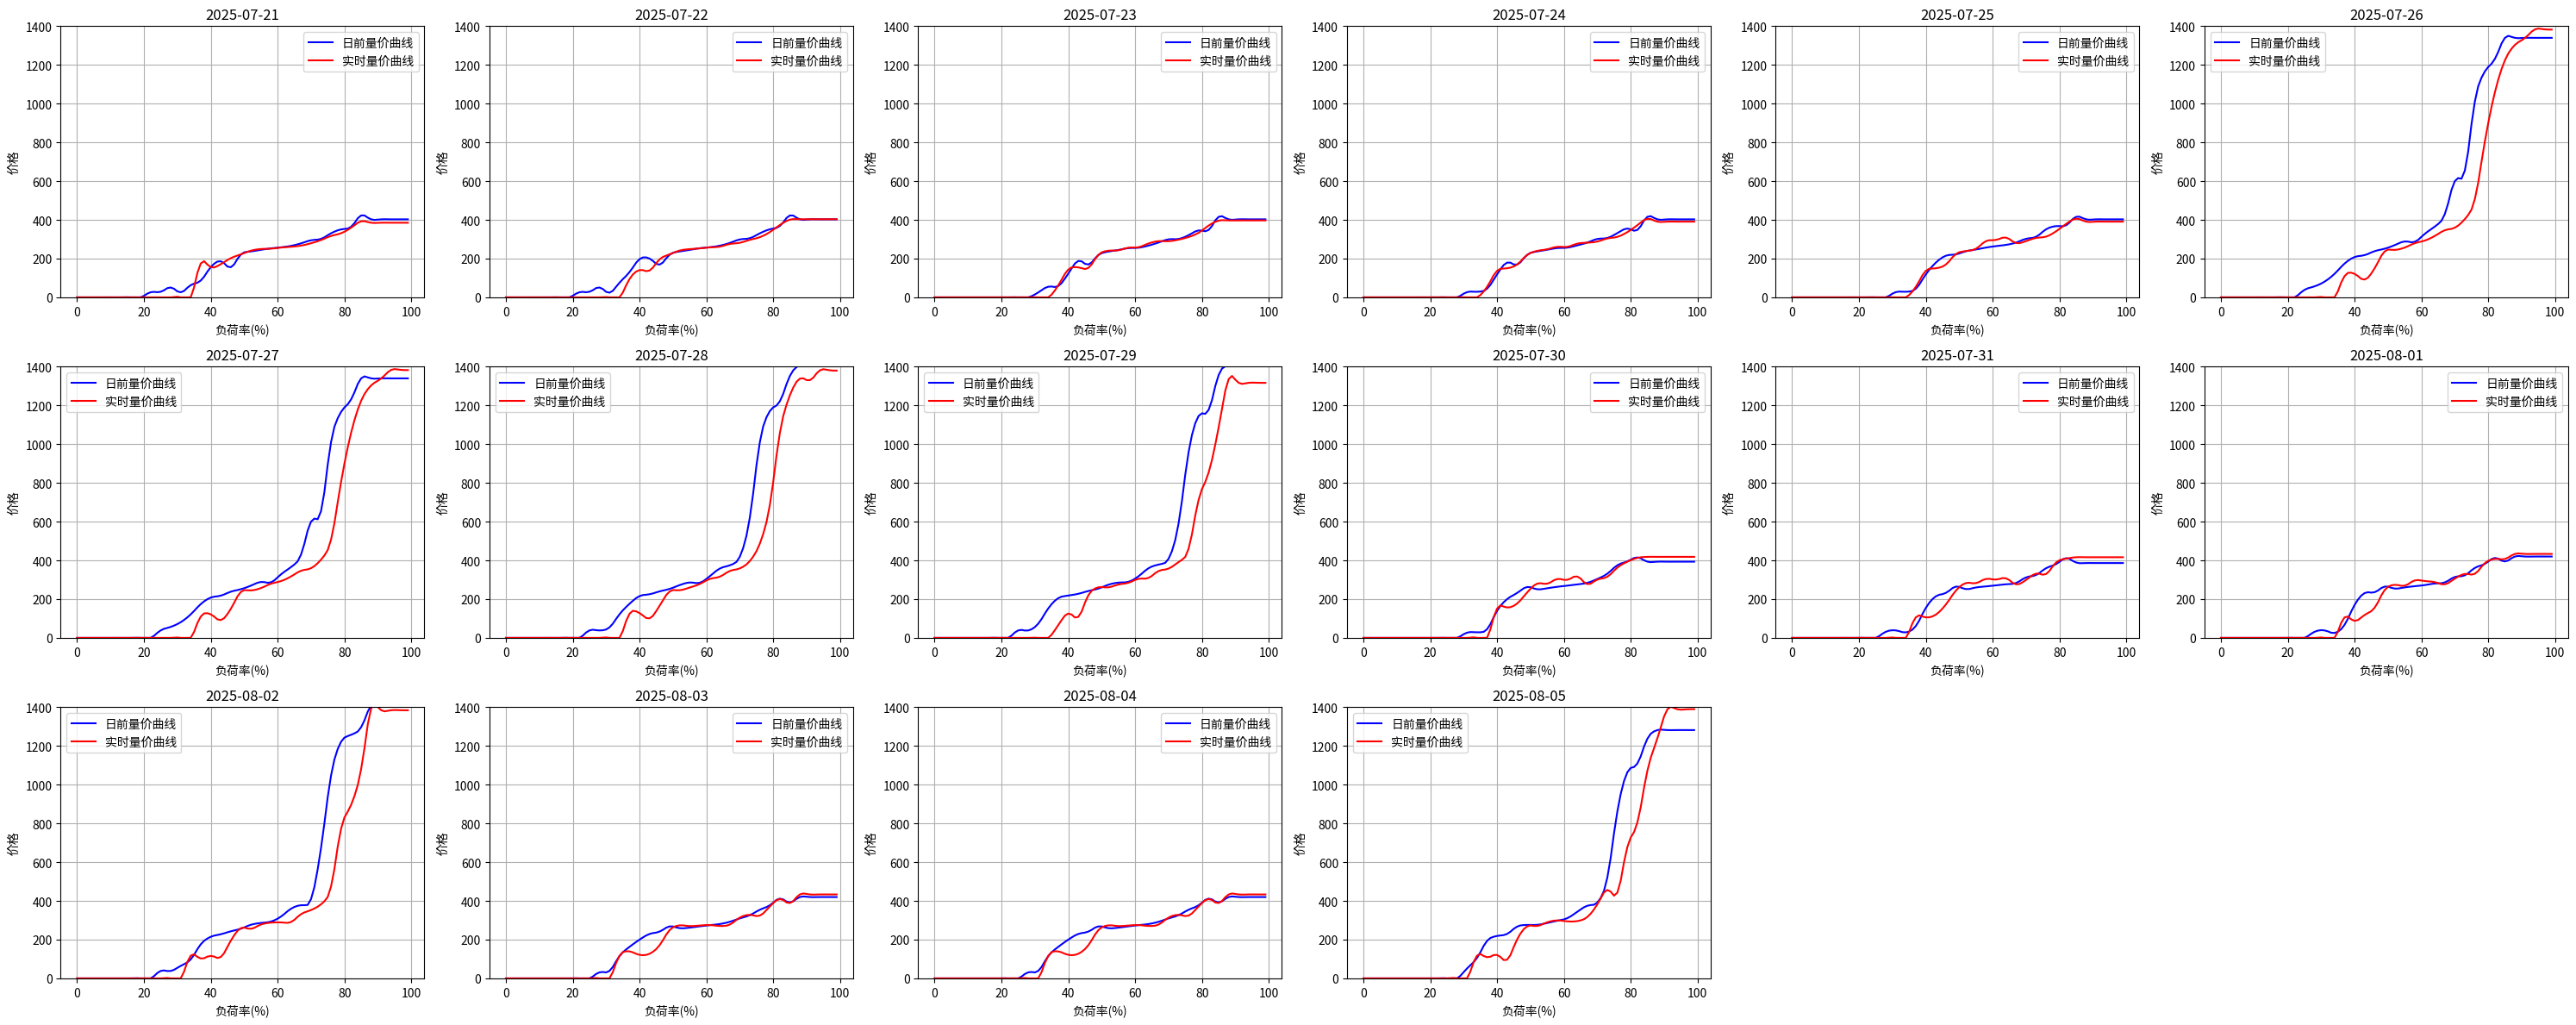

In [5]:
plot_loadrate_price_curves(curves_record_baseline)
plot_loadrate_price_curves(curves_record_match)

# 使用V2版本回测

In [6]:
# V2版本和V1版本是等价的，这里只是为了使用V2版本兼容性的“回测”接口

Index(['price', '实时价格', '实时在线机组容量(MW)', '实时负荷率(%)', '非市场化机组出力-日内(MW)',
       '联络线计划-日内(MW)', '竞价空间-日内(MW)', '频率实际值(MW)', '实际上旋备用(MW)', '实际下旋备用(MW)',
       '省调负荷-日内(MW)', '新能源负荷-日内(MW)', '实时风电(MW)', '实时光伏(MW)', '水电出力值-日内(MW)',
       '日前在线机组容量(MW)', '日前负荷率(%)', '非市场化机组出力-日前(MW)', '联络线计划-日前(MW)',
       '竞价空间-日前(MW)', '省调负荷-日前(MW)', '新能源负荷-日前(MW)', '正备用-日前(MW)',
       '新能源负荷备用-日前(MW)', '日前光伏(MW)', '日前风电(MW)'],
      dtype='object')


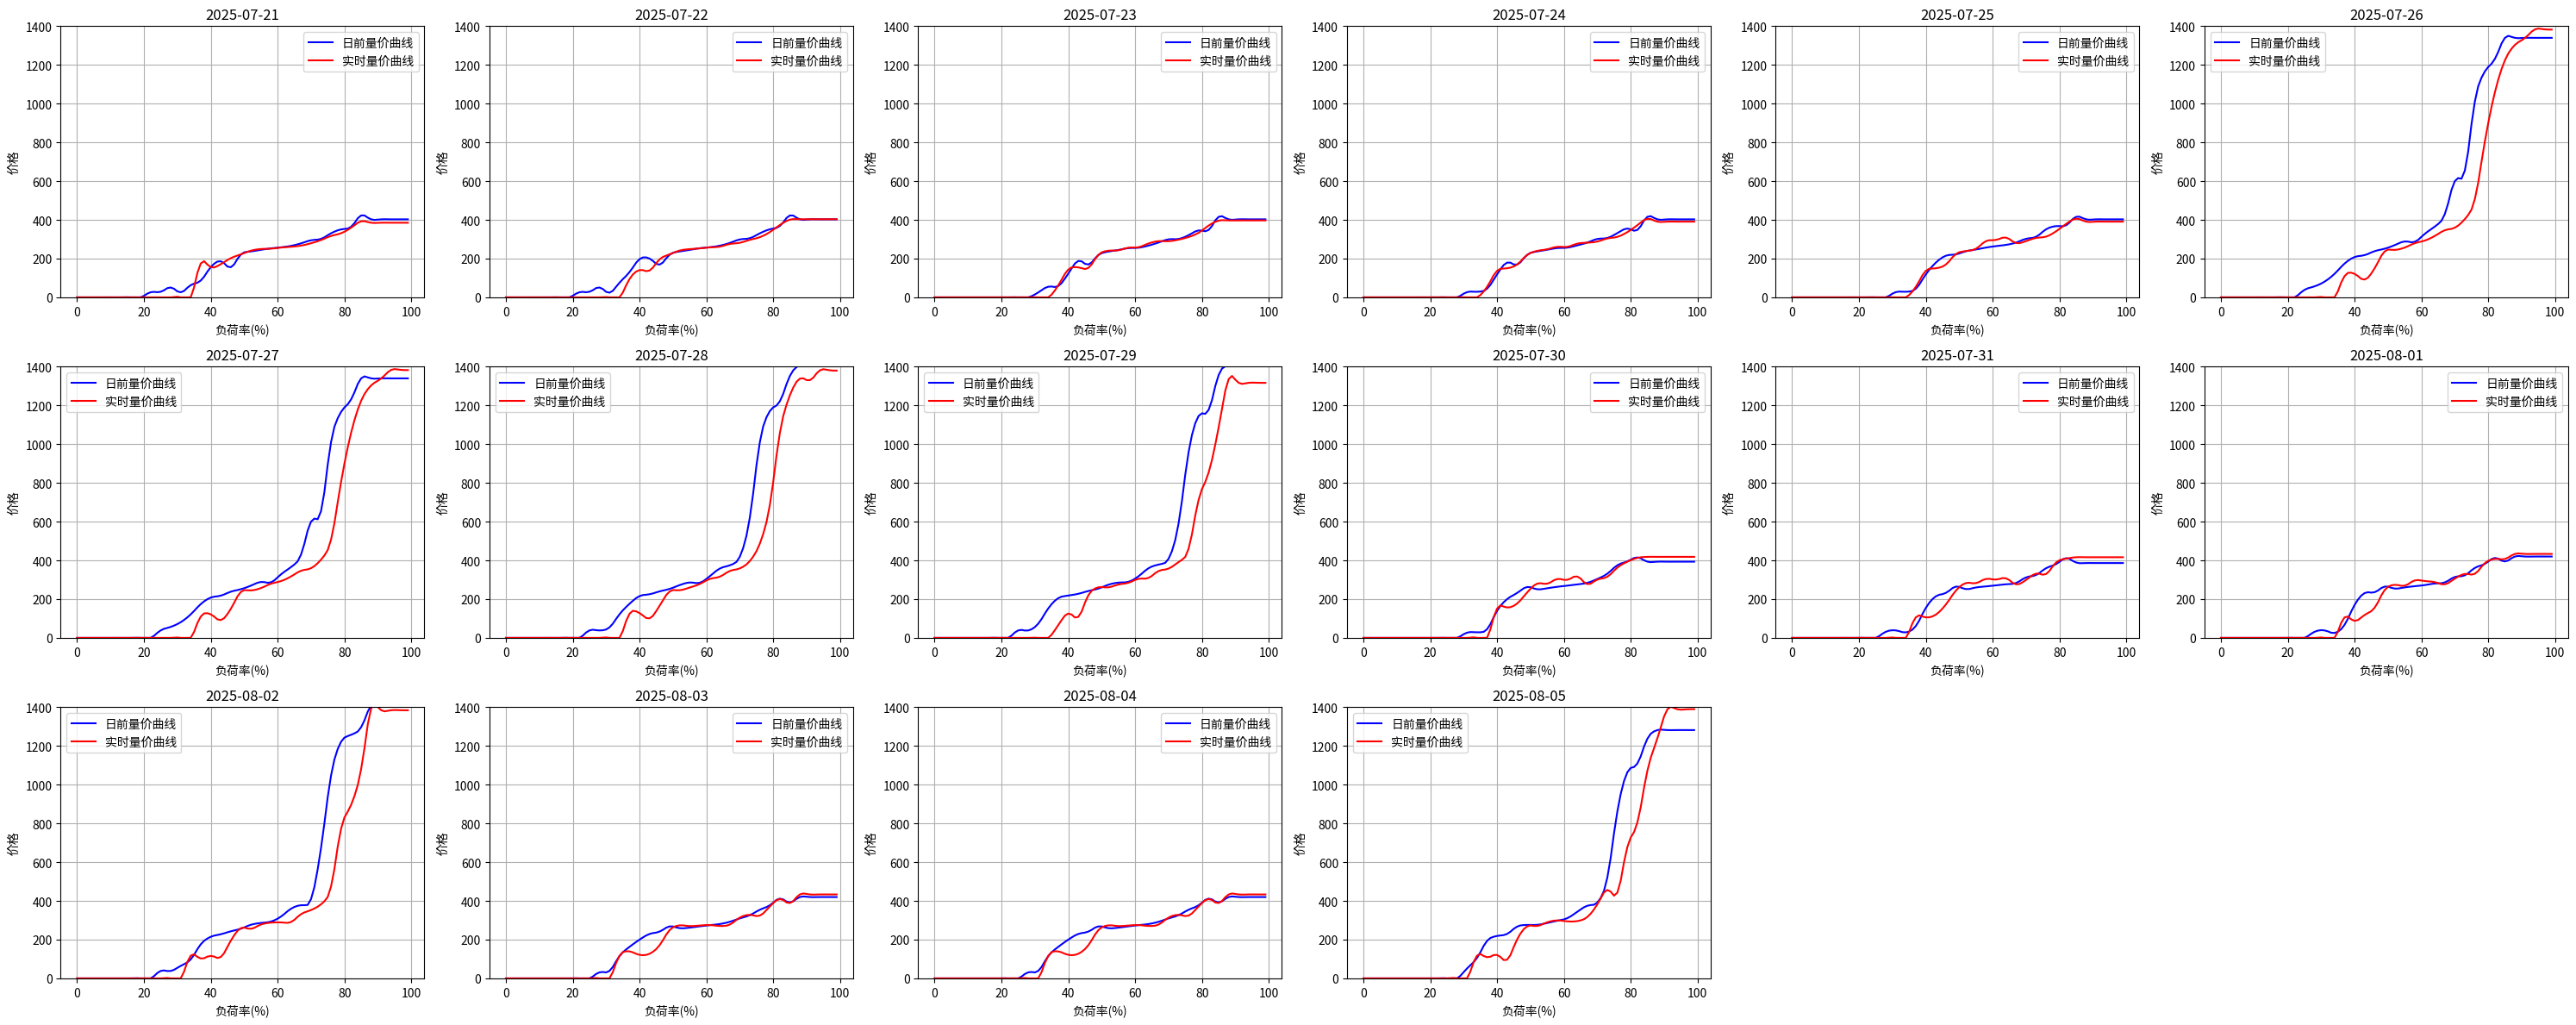

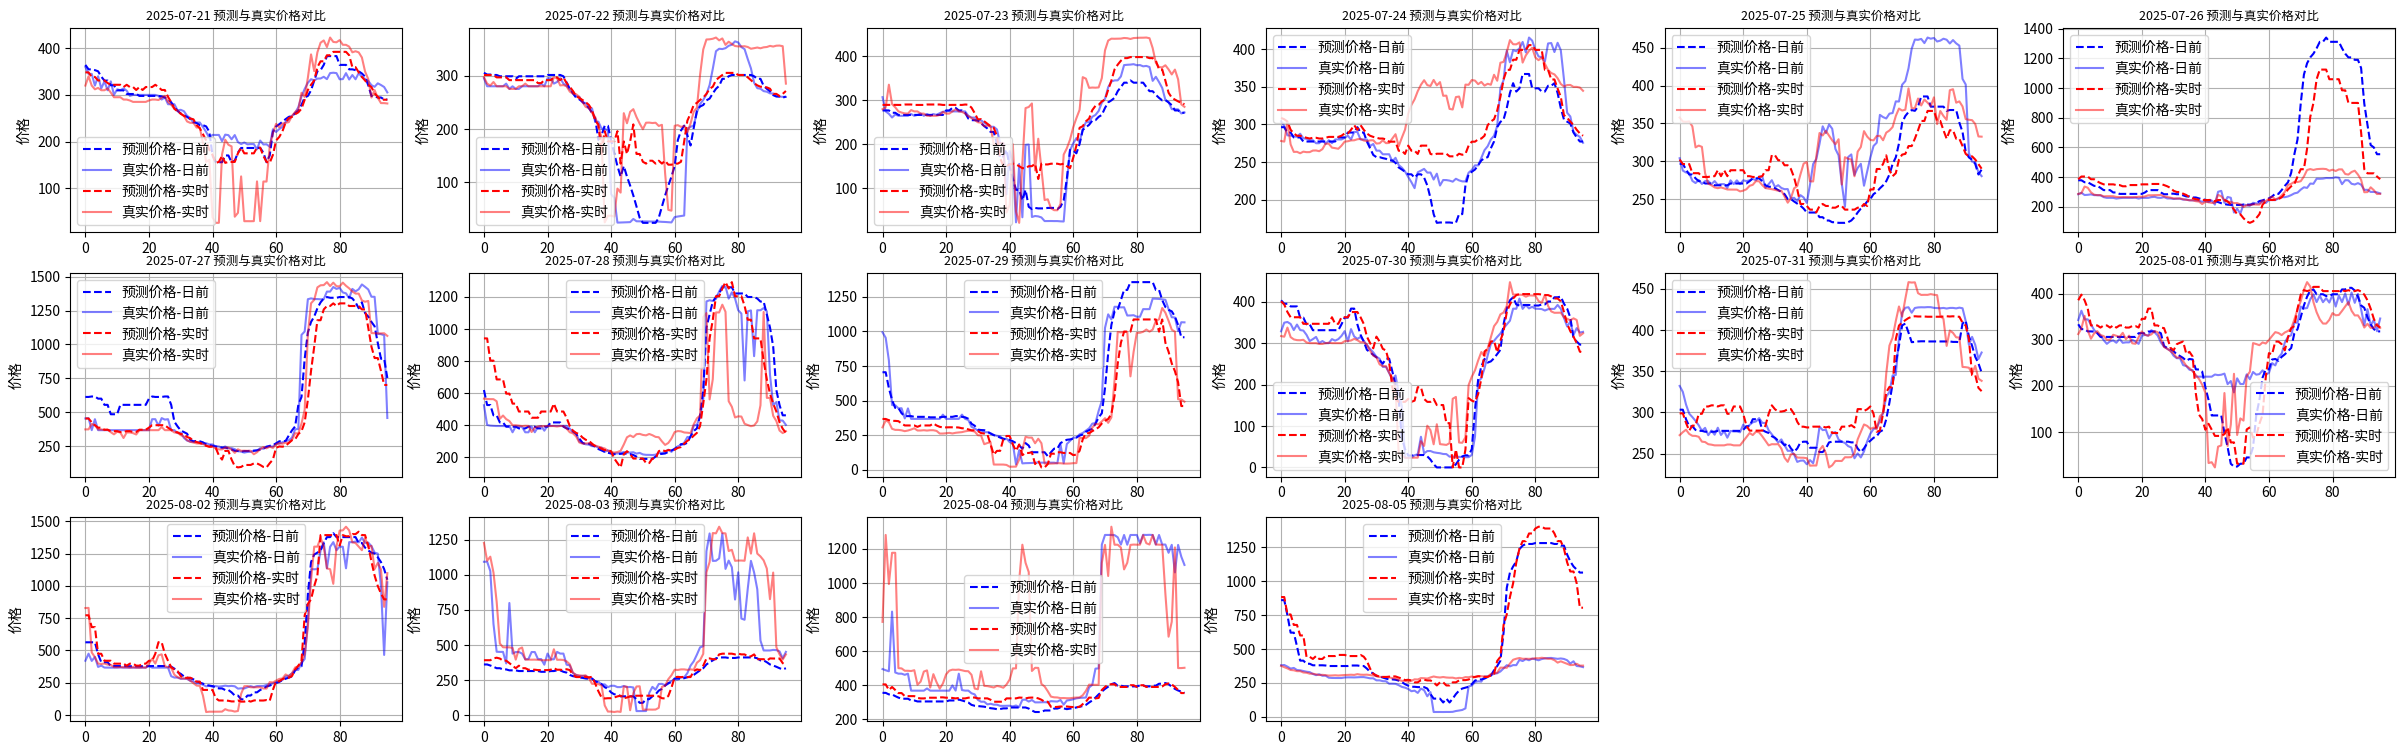

In [7]:
import sys
sys.path.append("../")
from utils.RollingLoadratePrice_utils_V2 import (
    process_market_data,
    build_curves_record_with_history_from_csv,   # 统一入口
    plot_static_curves_unified,                  # 可选：统一画图
    plot_price_timeseries_unified,               # 可选：统一画图
)
from utils.RollingLoadratePrice_utils_V1 import split_correct_wrong_by_csv

# 1) 处理市场数据
market_data = pd.read_parquet("../data/processed/shanxi_new.parquet",engine='fastparquet')
market_data = process_market_data(market_data, date_begin="2025-01-01", date_end="2025-08-05")
pred_csv_path="../save/curve_classify/multi_GRU_predict_results_V2.csv"
truth_csv_path="../data/processed/hiking_01_dataset.csv"
date_begin="2025-07-21" 
date_end="2025-08-05"

# 2) 统一接口（明确指定 backtest + loadrate）
curves_record_match = build_curves_record_with_history_from_csv(
    market_data=market_data,
    date_begin=date_begin,
    date_end=date_end,
    d=5,
    pattern="backtest",     # ← 明确：回测
    x_mode="loadrate",      # ← 明确：负荷率
    pred_csv_path=pred_csv_path,
    truth_csv_path=truth_csv_path,
    selection="match",
)

curves_record_baseline = build_curves_record_with_history_from_csv(
    market_data=market_data,
    date_begin=date_begin,
    date_end=date_end,
    d=5,
    pattern="backtest",
    x_mode="loadrate",
    # baseline 不需要 pred/truth，可直接省略
    selection="baseline",
)

# 3) 对错拆分依旧可用
correct, wrong = split_correct_wrong_by_csv(
    csv_path=pred_csv_path,
    date_begin=date_begin,
    date_end=date_end,
)

# 4)（可选）画图也可以走统一入口
# 多天回测 → 多子图
plot_static_curves_unified(curves_record_match, pattern="backtest", x_mode="loadrate")
plot_price_timeseries_unified(curves_record_match, pattern="backtest")


# 每月回测指标

Index(['price', '实时价格', '实时在线机组容量(MW)', '实时负荷率(%)', '非市场化机组出力-日内(MW)',
       '联络线计划-日内(MW)', '竞价空间-日内(MW)', '频率实际值(MW)', '实际上旋备用(MW)', '实际下旋备用(MW)',
       '省调负荷-日内(MW)', '新能源负荷-日内(MW)', '实时风电(MW)', '实时光伏(MW)', '水电出力值-日内(MW)',
       '日前在线机组容量(MW)', '日前负荷率(%)', '非市场化机组出力-日前(MW)', '联络线计划-日前(MW)',
       '竞价空间-日前(MW)', '省调负荷-日前(MW)', '新能源负荷-日前(MW)', '正备用-日前(MW)',
       '新能源负荷备用-日前(MW)', '日前光伏(MW)', '日前风电(MW)'],
      dtype='object')
评估区间：2025-03-01 ~ 2025-07-31（按数据自动取交集）

=== 月度准确率（DA）===
selection   baseline   match   delta
month                               
2025-03-01    0.7095  0.7972  0.0877
2025-04-01    0.6642  0.8159  0.1517
2025-05-01    0.6226  0.7849  0.1623
2025-06-01    0.6967  0.7091  0.0123
2025-07-01    0.6609  0.7955  0.1346

=== 月度准确率（RT）===
selection   baseline   match   delta
month                               
2025-03-01    0.6082  0.7234  0.1152
2025-04-01    0.6038  0.7387  0.1350
2025-05-01    0.6206  0.7537  0.1331
2025-06-01    0.5525  0.6193  0.0669
2025-07

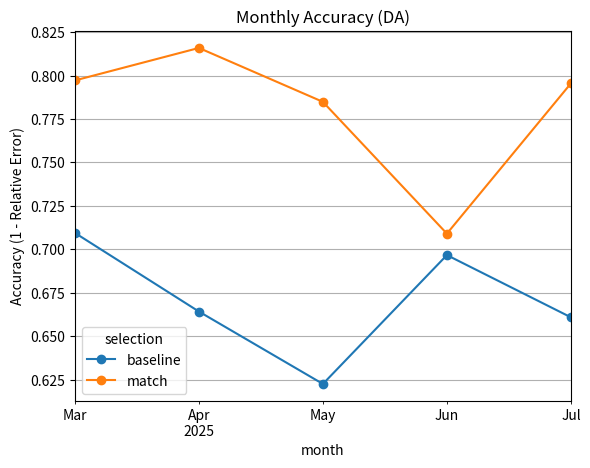

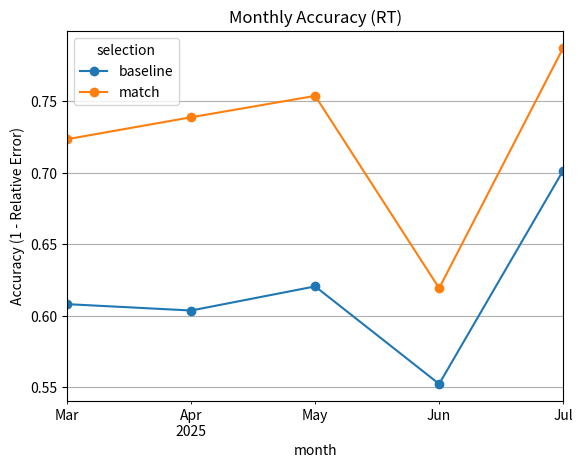

In [8]:
# === 0) 路径与区间 ===
import pandas as pd
import numpy as np

import sys
sys.path.append("../")  # 确保 utils 在路径中

from utils.RollingLoadratePrice_utils_V1 import (
    process_market_data,
    build_curves_record_with_history_classify_from_csv,
    load_pred_series_from_csv,         # 仅用来拿到可用日期范围
)

# 数据路径（按你的目录）
parquet_path = "../data/processed/shanxi_new.parquet"
pred_csv_path = "../save/curve_classify/multi_GRU_predict_results_V2.csv"
truth_csv_path = "../data/processed/hiking_01_dataset.csv"   # selection='match' 需要

# 评估区间（建议取“市场数据 ∩ 预测CSV”交集）
date_begin = "2025-03-01"
date_end   = "2025-07-31"

# 量价曲线历史天数 d
d = 5

# === 1) 读数据 & 预处理 ===
mdf_raw = pd.read_parquet(parquet_path, engine="fastparquet")
market_data = process_market_data(mdf_raw.copy(), date_begin=date_begin, date_end=date_end)

# 为了安全，取与预测CSV的交集（按天）
pred_days = load_pred_series_from_csv(pred_csv_path).index
avail_days = pd.to_datetime(market_data.index.normalize().unique())
lo = max(pd.to_datetime(date_begin), pred_days.min(), avail_days.min())
hi = min(pd.to_datetime(date_end),   pred_days.max(), avail_days.max())
date_begin_eval = lo.strftime("%Y-%m-%d")
date_end_eval   = hi.strftime("%Y-%m-%d")
print(f"评估区间：{date_begin_eval} ~ {date_end_eval}（按数据自动取交集）")

# === 2) 构建两套 curves_record（baseline vs match） ===
def build_curves(selection: str):
    return build_curves_record_with_history_classify_from_csv(
        market_data=market_data,
        date_begin=date_begin_eval,
        date_end=date_end_eval,
        d=d,
        pred_csv_path=pred_csv_path,
        truth_csv_path=(truth_csv_path if selection != "baseline" else None),
        selection=selection,
    )

curves_baseline = build_curves("baseline")
curves_match    = build_curves("match")

# === 3) 将 curves_record -> 每日指标（DA/RT 分开算） ===
def _safe_daily_metrics(curves_record: dict, kind: str) -> pd.DataFrame:
    """
    kind in {'da','rt'}
    产出列：date, kind, mae, mean_true, rel_err, accuracy
    """
    rows = []
    for dstr, c in curves_record.items():
        true = np.asarray(c["price_da"] if kind=="da" else c["price_rt"], dtype=float)
        pred_s = c["price_pred_da"] if kind=="da" else c["price_pred_rt"]
        pred = np.asarray(getattr(pred_s, "values", pred_s), dtype=float)

        # 长度对齐 + NaN 掩码
        n = min(len(true), len(pred))
        if n == 0: 
            continue
        true = true[:n]; pred = pred[:n]
        mask = np.isfinite(true) & np.isfinite(pred)
        if not mask.any():
            continue

        mae = np.mean(np.abs(pred[mask] - true[mask]))  # 绝对误差
        mean_true = np.mean(true[mask]) # 真实的均值
        rel_err = np.nan if mean_true <= 1e-8 else (mae / mean_true) # 相对误差
        acc = np.nan if not np.isfinite(rel_err) else (1.0 - rel_err) # 准确率

        rows.append({
            "date": pd.to_datetime(dstr),
            "kind": kind.upper(),          # 'DA' or 'RT'
            "mae": mae,
            "mean_true": mean_true,
            "rel_err": rel_err,
            "accuracy": acc,
            "n_points": int(mask.sum()),
        })
    return pd.DataFrame(rows).sort_values("date")

def eval_curves(curves_record: dict, selection_name: str) -> pd.DataFrame:
    df = pd.concat([
        _safe_daily_metrics(curves_record, "da"),
        _safe_daily_metrics(curves_record, "rt"),
    ], ignore_index=True)
    df["selection"] = selection_name  # 'baseline' or 'match'
    return df

daily_base  = eval_curves(curves_baseline, "baseline")
daily_match = eval_curves(curves_match,    "match")

daily_all = pd.concat([daily_base, daily_match], ignore_index=True)

# === 4) 按月汇总（平均准确率；同时给出样本天数） ===
def monthly_summary(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    out["month"] = out["date"].dt.to_period("M").dt.to_timestamp()
    g = out.groupby(["month", "kind", "selection"], dropna=True)
    return g.agg(
        monthly_accuracy=("accuracy", "mean"),
        monthly_rel_err=("rel_err", "mean"),
        days=("date", "nunique")
    ).reset_index().sort_values(["month","kind","selection"])

monthly = monthly_summary(daily_all)

# 便于对比：分别做 DA / RT 的“baseline vs match”透视表
pivot_DA = monthly[monthly["kind"]=="DA"].pivot(index="month", columns="selection", values="monthly_accuracy")
pivot_RT = monthly[monthly["kind"]=="RT"].pivot(index="month", columns="selection", values="monthly_accuracy")
pivot_DA["delta"] = pivot_DA["match"] - pivot_DA["baseline"]
pivot_RT["delta"] = pivot_RT["match"] - pivot_RT["baseline"]

print("\n=== 月度准确率（DA）===")
print(pivot_DA.round(4))
print("\n=== 月度准确率（RT）===")
print(pivot_RT.round(4))

# 如果需要保存：
# monthly.to_csv("./monthly_accuracy_loadrate_price.csv", index=False)
# daily_all.to_csv("./daily_accuracy_loadrate_price.csv", index=False)

# （可选）快速画两张月度准确率对比图
import matplotlib.pyplot as plt

for kind, pvt in [("DA", pivot_DA), ("RT", pivot_RT)]:
    ax = pvt[["baseline","match"]].plot(marker="o", title=f"Monthly Accuracy ({kind})")
    ax.set_ylabel("Accuracy (1 - Relative Error)")
    ax.grid(True)
    plt.show()
